# CS 109A/AC 209A/STAT 121A Data Science: Homework 4
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 5th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from statsmodels.regression.linear_model import OLS
import sklearn.preprocessing as Preprocessing
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from itertools import combinations
%matplotlib inline


## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Mieling, Isabelle

### Part (b): Course Number

AC 209a

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Variable selection and regularization

The data set for this problem is provided in ``dataset_1.txt`` and contains 10 predictors and a response variable.

### Part (a): Analyze correlation among predictors
- By visually inspecting the data set, do find that some of the predictors are correlated amongst themselves?


- Compute the cofficient of correlation between each pair of predictors, and visualize the matrix of correlation coefficients using a heat map. Do the predictors fall naturally into groups based on the correlation values?


- If you were asked to select a minimal subset of predictors based on the correlation information in order to build a good regression model, how many predictors will you pick, and which ones will you choose? 

In [2]:
# Load data
data = np.loadtxt('dataset_1.txt', delimiter=',', skiprows=1)

# Split predictors and response
x = data[:, :-1]
y = data[:, -1]

df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.959357,0.959357,0.959357,0.343727,0.524083,0.537768,0.435598,0.831999,0.153247,0.005016,0.289394
1,0.616969,0.616969,0.616969,0.287376,0.513844,0.497775,0.452732,0.914609,0.367390,0.444473,-0.277574
2,0.995941,0.995941,0.995941,0.107294,0.097106,0.146751,0.136414,0.635926,0.535209,0.899457,-0.513097
3,0.821732,0.821732,0.821732,0.202558,0.329504,0.359471,0.281453,0.106263,0.479327,0.256271,-0.182353
4,0.302423,0.302423,0.302423,0.184564,0.270263,0.293385,0.263866,0.378630,0.740241,0.468589,-0.625117


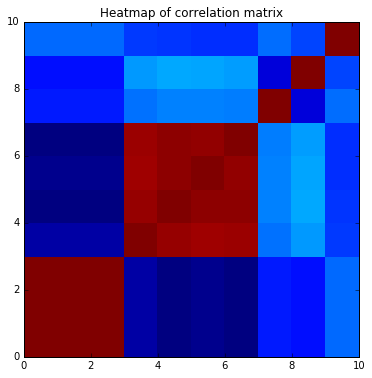

In [3]:
# Compute matrix of correlation coefficients
corr_matrix = np.corrcoef(x.T)

# Display heat map 
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.pcolor(corr_matrix)

ax.set_title('Heatmap of correlation matrix')

plt.show()

** Analysis ** 
The heatmap above displays the coefficient of correlation between each pair of predictors. As can be seen in the heatmap above, there are areas of high positive and negative correlation among the coefficients with high, positive correlation in red along the center diagonal and high, negative correlation surrounding this. We see particularly high correlation on the region spanning the coefficients 0 to 7. Along the diagonal we see the coefficients of correlation between a coefficient and itself. Since the diagonal is a deep red, we see that there is high positive correlation of the coefficients amongst themselves. Predictors 0-2 have high positive correlation amongst themselves, high negative correlation with predictors 3-7 and low negative correlation with predictors 7-10. Predictors 3-7 have high positive correlation amongst themselves and low negative correlation with predicts 8-10. The predicts fall naturally in some groups of correlation. 

If asked to select a minimal subset of predictors based on the correlation information in order to build a good regression model, I would pick predictors 0, 5-8.

### Part (b): Selecting minimal subset of predictors

- Apply the variable selection methods discussed in class to choose a minimal subset of predictors that yield high prediction accuracy:
    
    - Exhaustive search
    
    - Step-wise forward selection **or** Step-wise backward selection  

&emsp;&nbsp;&nbsp; In each method, use the Bayesian Information Criterion (BIC) to choose the subset size.

- Do the chosen subsets match the ones you picked using the correlation matrix you had visualized in Part (a)?

**Note**: You may use the `statsmodels`'s `OLS` module to fit a linear regression model and evaluate BIC. You may **not** use library functions that implement variable selection.

In [4]:
### Best Subset Selection
min_bic = 1e10 # set some initial large value for min BIC score
best_subset = [] # best subset of predictors

# Create all possible subsets of the set of 10 predictors
predictor_set = set(range(10)) # predictor set = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# Repeat for every possible size of subset
for size_k in range(10): 
    # Create all possible subsets of size 'size', 
    # using the 'combination' function from the 'itertools' library
    subsets_of_size_k = it.combinations(predictor_set, size_k + 1) # +1 becuase start at 0 in python 
    # output is list
    
    max_r_squared = -1e10 # set some initial small value for max R^2 score
    best_k_subset = [] # best subset of predictors of size k
    
    # Iterate over all subsets of our predictor set
    for predictor_subset in subsets_of_size_k:     
        # iterate through subsets
        # Use only a subset of predictors in the training data
        x_subset = x[:, predictor_subset]

        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Update max R^2 and best predictor subset of size k
        # If current predictor subset has a higher R^2 score than that of the best subset 
        # we've found so far, remember the current predictor subset as the best!
        if(r_squared > max_r_squared): 
            max_r_squared = r_squared
            best_k_subset = predictor_subset[:]
                

    # Use only the best subset of size k for the predictors
    x_subset = x[:, best_k_subset]
        
    # Fit and evaluate BIC of the best subset of size k
    model = OLS(y, x_subset)
    results = model.fit()
    bic = results.bic
    
    # Update minimum BIC and best predictor subset
    # If current predictor has a lower BIC score than that of the best subset 
    # we've found so far, remember the current predictor as the best!
    if(bic < min_bic): 
        min_bic = bic
        best_subset = best_k_subset[:]
    
print('Best subset by exhaustive search:')
print sorted(best_subset)

Best subset by exhaustive search:
[0, 5, 7, 8, 9]


In [5]:
### Step-wise Forward Selection
d = x.shape[1] # total no. of predictors
# x are the predictors so shape x gives number of predictors 

# Keep track of current set of chosen predictors, and the remaining set of predictors
current_predictors = [] 
remaining_predictors = range(d)

# Set some initial large value for min BIC score for all possible subsets
global_min_bic = 1e10 

# Keep track of the best subset of predictors
best_subset = [] 

# Iterate over all possible subset sizes, 0 predictors to d predictors
for size in range(d):    
    max_r_squared = -1e10 # set some initial small value for max R^2
    best_predictor = -1 # set some throwaway initial number for the best predictor to add
    bic_with_best_predictor = 1e10 # set some initial large value for BIC score   
        
    # Iterate over all remaining predictors to find best predictor to add
    for i in remaining_predictors:
        # Make copy of current set of predictors
        temp = current_predictors[:]
        # Add predictor 'i'
        temp.append(i)
                                    
        # Use only a subset of predictors in the training data
        x_subset = x[:, temp]
        
        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Check if we get a higher R^2 value than than current max R^2, if so, update
        if(r_squared > max_r_squared):
            max_r_squared = r_squared
            best_predictor = i
            bic_with_best_predictor = results.bic
    
    # Remove best predictor from remaining list, and add best predictor to current list
    remaining_predictors.remove(best_predictor)
    current_predictors.append(best_predictor)
    
    # Check if BIC for with the predictor we just added is lower than 
    # the global minimum across all subset of predictors
    if(bic_with_best_predictor < global_min_bic):
        best_subset = current_predictors[:]
        global_min_bic = bic_with_best_predictor
    
print 'Step-wise forward subset selection:'
print sorted(best_subset) # add 1 as indices start from 0

Step-wise forward subset selection:
[0, 5, 7, 8, 9]


In [6]:
###  Step-wise Backward Selection
d = x.shape[1] # total no. of predictors

# Keep track of current set of chosen predictors
current_predictors = range(d)

# First, fit and evaluate BIC using all 'd' number of predictors
model = OLS(y, x)
results = model.fit()
bic_all = results.bic

# Set the minimum BIC score, initially, to the BIC score using all 'd' predictors
global_min_bic = bic_all
# Keep track of the best subset of predictors
best_subset = [] 

# Iterate over all possible subset sizes, d predictors to 1 predictor
for size in range(d - 1, 1, -1): # stop before 0 to avoid choosing an empty set of predictors
    max_r_squared = -1e10 # set some initial small value for max R^2
    worst_predictor = -1 # set some throwaway initial number for the worst predictor to remove
    bic_without_worst_predictor = 1e10 # set some initial large value for min BIC score  
        
    # Iterate over current set of predictors (for potential elimination)
    for i in current_predictors:
        # Create copy of current predictors, and remove predictor 'i'
        temp = current_predictors[:]
        temp.remove(i)
                                    
        # Use only a subset of predictors in the training data
        x_subset = x[:, temp]
        
        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Check if we get a higher R^2 value than than current max R^2, if so, update
        if(r_squared > max_r_squared):
            max_r_squared = r_squared
            worst_predictor = i
            bic_without_worst_predictor = results.bic
          
    # Remove worst predictor from current set of predictors
    current_predictors.remove(worst_predictor)
    
    # Check if BIC for the predictor we just removed is lower than 
    # the global minimum across all subset of predictors
    if(bic_without_worst_predictor < global_min_bic):
        best_subset = current_predictors[:]
        global_min_bic = bic_without_worst_predictor
    
print 'Step-wise backward subset selection:'
print sorted(best_subset)

Step-wise backward subset selection:
[2, 5, 7, 8, 9]


** Analysis ** 
The chosen subset from the exhaustive search does not fully match that one chosen based on the correlation matrix from Part a. Predictors 0, 5, 7, and 8 are in both models but there is also some variability between the two chosen subsets. 

### Part (c): Apply Lasso and Ridge regression

- Apply Lasso regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Apply Ridge regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Is there a difference between the model parameters you obtain different and those obtained from Lasso regression? If so, explain why.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Is there anything peculiar that you observe about the coefficients Ridge regression assigns to the first three predictors? Do you observe the same with Lasso regression? Give an explanation for your observation.

**Note**: You may use the `statsmodels` or `sklearn` to perform Lasso and Ridge regression.

In [7]:
# Lasso regression
reg = Lasso_Reg(alpha = 0.01)
reg.fit(x, y)
coefficients = reg.coef_

print 'Lasso:'
print 'Coefficients:', coefficients
print  'Predictors with non-zero coefficients:', [i for i, item in enumerate(coefficients) if abs(item) > 0]

Lasso:
Coefficients: [ 0.02717417  0.          0.         -0.         -0.02532806 -0.         -0.
  0.04397321 -0.40612185 -0.22260474]
Predictors with non-zero coefficients: [0, 4, 7, 8, 9]


We see here the predictors with non-zero coefficients and they do somewhat match the correlation matrix from Part a. 

In [9]:
# Ridge regression: Fit and evaluate 
reg = Ridge_Reg(alpha = 0.01)
x[:,1] = x[:,0]
x[:,2] = x[:,0]
reg.fit(x, y)
coefficients = reg.coef_

print 'Ridge:'
print 'Coefficients:', coefficients
print 'Predictors with non-zero coefficients:', [i for i, item in enumerate(coefficients) if abs(item) > 0]

Ridge:
Coefficients: [ 0.04353543  0.04353543  0.04353543  0.55217415 -0.19706852 -0.61421737
  0.30484213  0.18742866 -0.50083242 -0.35908145]
Predictors with non-zero coefficients: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Problem 2: Cross-validation and Bootstrapping
In this problem, you will work with an expanded version of the automobile pricing data set you analyzed in Homework 3. The data set is contained ``dataset_2.txt``, with 26 attribues (i.e. predictors) for each automobile and corresponding prices. 

### Part(a): Encode categorical attributes and fill missing values
Identify the categorical attributes in the data. Replace their values with the one-hot binary encoding. You may do this using the `get_dummies()` function in `pandas`. If you do this task correctly, you should get a total of 69 predictors after the encoding.


In [75]:
# Price is the last column --> is the outcome variable

In [10]:
x_df = pd.read_csv('dataset_2.txt')
x_df.head

<bound method DataFrame.head of      horsepower  highway-mpg  symboling  normalized-losses           make  \
0          95.0         24.0   0.000000         120.232558         peugot   
1         116.0         30.0   2.000000         134.000000         toyota   
2         121.0         28.0   0.000000         188.000000            bmw   
3         184.0         16.0   0.000000         120.232558  mercedes-benz   
4         111.0         29.0   0.000000         102.000000         subaru   
5          70.0         43.0   0.000000          81.000000      chevrolet   
6          97.0         24.0   0.000000         161.000000         peugot   
7         140.0         20.0   1.000000         158.000000           audi   
8          86.0         33.0   0.000000          85.000000          honda   
9          69.0         37.0   1.000000         128.000000         nissan   
10        145.0         24.0   3.000000         120.232558     mitsubishi   
11         70.0         34.0   1.000000     

In [11]:
d = np.shape(x_df)[1]
# Record start index of attribute in expanded feature vector 
start_index = np.zeros(d+1) # last entry would contain the len of vector + 1 

# Create a new data frame to store one-hot encoding of attributes

x_df_expanded = pd.DataFrame({})

# Iterate over all attributes
for column in x_df.columns:
    # check if attribute is categorical, has less than 8 unique values, or is string values
    if len(x_df[column].unique()) < 8 or x_df[column].dtype == np.dtype('object'):
        encoding = pd.get_dummies(x_df[column])
        x_df_expanded = pd.concat([x_df_expanded, encoding], axis=1)
    else:
        x_df_expanded = pd.concat([x_df_expanded, x_df[[column]]], axis=1)

x_df_expanded.head(10)


,horsepower,highway-mpg,-2.0,0.0,1.0,1.09604519774,2.0,3.0,normalized-losses,audi,...,2bbl,idi,mpfi,spdi,bore,stroke,compression-ratio,peak-rpm,city-mpg,price
0,95.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,120.232558,0.0,...,0.0,0.0,1.0,0.0,3.46,2.19,8.4,5000.0,19.0,16695.0
1,116.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,134.000000,0.0,...,0.0,0.0,1.0,0.0,3.62,3.50,9.3,4800.0,24.0,11199.0
2,121.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,188.000000,0.0,...,0.0,0.0,1.0,0.0,3.31,3.19,9.0,4250.0,21.0,20970.0
3,184.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,120.232558,0.0,...,0.0,0.0,1.0,0.0,3.80,3.35,8.0,4500.0,14.0,40960.0
4,111.0,29.0,0.0,1.0,0.0,0.0,0.0,0.0,102.000000,0.0,...,0.0,0.0,1.0,0.0,3.62,2.64,7.7,4800.0,24.0,11259.0
5,70.0,43.0,0.0,1.0,0.0,0.0,0.0,0.0,81.000000,0.0,...,1.0,0.0,0.0,0.0,3.03,3.11,9.6,5400.0,38.0,6575.0
6,97.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,161.000000,0.0,...,0.0,0.0,1.0,0.0,3.46,3.19,8.4,5000.0,19.0,11900.0
7,140.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,158.000000,1.0,...,0.0,0.0,1.0,0.0,3.13,3.40,8.3,5500.0,17.0,23875.0
8,86.0,33.0,0.0,1.0,0.0,0.0,0.0,0.0,85.000000,0.0,...,0.0,0.0,0.0,0.0,3.15,3.58,9.0,5800.0,27.0,8845.0
9,69.0,37.0,0.0,0.0,1.0,0.0,0.0,0.0,128.000000,0.0,...,1.0,0.0,0.0,0.0,3.15,3.29,9.4,5200.0,31.0,5499.0


In [12]:
print type(x_df_expanded)

<class 'pandas.core.frame.DataFrame'>


In [13]:
print len(x_df_expanded.columns)

70


** Analysis ** We have 69 predictors, leaving a total of 70 variables in the dataset. We currently have a Pandas DataFrame with our data.

### Part (b): Apply regular linear regression
- Split the data set into train and test sets, with the first 25% of the data for training and the remaining for testing.  


- Use regular linear regression to fit a model to the training set and evaluate the R^2 score of the fitted model on both the training and test sets. What do you observe about these values?


- You had seen in class that the R^2 value of a least-squares fit to a data set would lie between 0 and 1. Is this true for the test R^2 values reported above? If not, give a reason for why this is the case.


- Is there a need for regularization while fitting a linear model to this data set?

**Note**: You may use the `statsmodels` or `sklearn` to fit a linear regression model and evaluate the fits.

In [17]:
df_numpy = x_df_expanded.as_matrix(columns=None)
twent_five = int(len(df_numpy)*(0.25))
training, test = df_numpy[:twent_five,:], df_numpy[twent_five:,:]

x_train = training[:,:-1]
y_train = training[:,-1]
x_test = test[:,:-1]
y_test = test[:,-1]

In [19]:
linmodel = Lin_Reg()
linmodel = linmodel.fit(x_train, y_train)
predicted_y = linmodel.predict(x_test)

r_train_plain = linmodel.score(x_train, y_train)
r_test_plain = linmodel.score(x_test, y_test)

print 'R^2 Value for Training Set: ' , r_train_plain
print 'R^2 Value for Testing Set: ' , r_test_plain

R^2 Value for Training Set:  1.0
R^2 Value for Testing Set:  -5.97542556681


Here we observe that the R^2 value for the training set is 1 and that for the testing set is about -6. No, here the R^2 value for the testing set is a negative number. Here, the R^2 value might be a negative number because the chosen model does not follow the trend of the data and actually fits worse than a horizontal line. There may be a need for regularization while fitting the linear model to this data set.  


### Part (c): Apply Ridge regression

- Apply Ridge regression on the training set for different values of the regularization parameter $\lambda$ in the range $\{10^{-7}, 10^{-6}, \ldots, 10^7\}$. Evaluate the R^2 score for the models you obtain on both the train and test sets. Plot both values as a function of $\lambda$. 


- Explain the relationship between the regularization parameter and the training and test R^2 scores.


- How does the best test R^2 value obtained using Ridge regression compare with that of plain linear regression? Explain.

**Note**: You may use the `statsmodels` or `sklearn` to fit a ridge regression model and evaluate the fits.

In [33]:
print type(x_train)
print len(x_train) ,len( y_train), len(x_test), len( y_test)
print x_train.shape
print y_train.shape

<type 'numpy.ndarray'>
51 51 154 154
(51, 69)
(51,)


In [34]:
# Ridge Regression from lecture 7 
reg = Ridge_Reg(alpha = 1.0)
reg.fit(x_train, y_train)
coefficients = reg.coef_

predictors = [i for i, item in enumerate(coefficients) if abs(item) > 0]

print 'Ridge:'
print 'Coefficients:', coefficients
print  'Selected predictors:',predictors  
print 'Ridge Regression: R^2 score on training set', reg.score(x_train, y_train)
print 'Ridge Regression: R^2 score on test set', reg.score(x_test, y_test)

Ridge:
Coefficients: [  3.78622144e+01  -1.47840026e+02   0.00000000e+00   1.11153760e+03
   9.05521228e+02  -1.08386417e+03  -4.82893771e+02  -4.50300894e+02
   1.02060279e+01   3.39461486e+02   1.14809954e+03   2.90297979e+02
  -1.16043239e+03  -6.43051423e+02  -3.13196476e+02   1.11989129e+03
   0.00000000e+00   3.26619761e+01  -7.48477118e+02  -9.01220371e+02
  -3.29496183e+02   1.43613057e+03   0.00000000e+00   9.00750568e+02
  -8.83863020e+02  -1.07935148e+03   9.64783961e+02  -1.72988907e+02
  -1.36545082e+02   1.36545082e+02  -2.59827342e+02   2.59827342e+02
   3.40545588e+02  -3.40545588e+02   0.00000000e+00   8.44060185e+02
  -1.92188672e+02  -5.03324943e+02  -1.48546570e+02   1.57969879e+02
   1.34141927e+02  -2.92111806e+02  -1.43613057e+03   1.43613057e+03
   1.08927263e+02  -1.84792525e+01   1.12704541e+02   2.64132743e+02
  -1.82706484e-01  -1.96239611e+03  -9.01220371e+02   1.62494084e+03
   5.52267551e+02   6.86408091e+02   6.86408091e+02   7.72944683e+02
  -1.75402198

In [38]:
# Run for different values of lambda 
lambda_min = -7
lambda_max = 7

num_lambdas = 1000
num_predictors = x_train.shape[1]

lambdas= np.linspace(lambda_min,lambda_max, num_lambdas)

train_r_squared = np.zeros(num_lambdas)
test_r_squared = np.zeros(num_lambdas)

coeff_a =np.zeros((num_lambdas, num_predictors))

In [42]:
for ind, i in enumerate(lambdas):    
    # Fit ridge regression on train set
    reg = Ridge_Reg(alpha = 10**i)
    reg.fit(x_train, y_train)
       
    coeff_a[ind,:] = reg.coef_
    # Evaluate train & test performance
    train_r_squared[ind] = reg.score(x_train, y_train)
    test_r_squared[ind] = reg.score(x_test, y_test)   

NameError: name 'test_r_squared_plain' is not defined

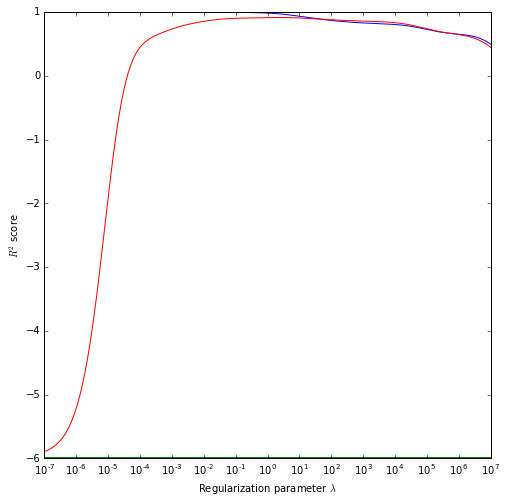

In [43]:
# Plot train an test R-squared as a function parameter value
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.axhline(y = r_test_plain, c='g', label = 'Plain Regression')
ax.semilogx(10.0**lambdas, (train_r_squared), c='b', label='Ridge: Train')
ax.semilogx(10.0**lambdas, (test_r_squared), c='r', label='Ridge: Test')


ax.set_xlabel('Regularization parameter $\lambda$')
ax.set_ylabel(r'$R^2$ score')

ax.set_ylim((test_r_squared_plain-0.2, 1.2))
ax.legend(loc = 'best')

print 'Ridge Regression: max R^2 score on training set', max(train_r_squared)
print 'Ridge Regression: max R^2 score on test set', max(test_r_squared)

reg = Lasso_Reg(alpha =lambdas[np.argmax(test_r_squared)])
reg.fit(x_train, y_train)
coefficients = reg.coef_
print coefficients
print  'Selected predictors:', [i for i, item in enumerate(coefficients) if abs(item) > 0]
plt.show()

### Part (d): Tune regularization parameter using cross-validation and bootstrapping
-  Evaluate the performance of the Ridge regression for different regularization parameters $\lambda$ using 5-fold cross validation **or** bootstrapping on the training set. 

    - Plot the cross-validation (CV) or bootstrapping R^2 score as a function of $\lambda$. 
    
    - How closely does the CV score or bootstrapping score match the R^2 score on the test set? Does the model with lowest CV score or bootstrapping score correspond to the one with maximum R^2 on the test set?
    
    - Does the model chosen by CV or bootstrapping perform better than plain linear regression?

**Note**: You may use the `statsmodels` or `sklearn` to fit a linear regression model and evaluate the fits. You may also use `kFold` from `sklearn.cross_validation`. 

In [44]:
def plotR():
    # training set = training
    # x_train, y_train
    
    # size of data set
    n = x_train.shape[0]
    
    # number of subsamples 
    num_samples = 200
    
    # Ridge Regression 
    
    # coefficients 
    # Create a n  array to store coefficients for all subsamples
    coefs_a = np.zeros((num_samples, 69))
    # array with all 0s
    # 200x2, 200 samples with 2 columns
    # bootstrapping 200 times 
    # have 69 predictors 
    
    for i in range(num_samples):

        # Generate a random subsample of data points
        # This is the bootstrap 
        # 
        perm =np.random.randint(low=0, high=n, size=50) # Generate a list of indices 0 to n and permute it
        # size 50 
        x_subsample = x_train[perm] 
        y_subsample = y_train[perm]
        # from a random set of n integers, I take those indices fro mmy x 
        # perm is a listof random numbers, and i take those as indices to create the subsample
        # this will pick out rows
        
        # Fit ridge regression for all parameters 
        reg = Ridge_Reg(alpha = 1.0)
        reg.fit(x_subsample, y_subsample)
        coefficients = reg.coef_
        predictors = [i for i, item in enumerate(coefficients) if abs(item) > 0]
        
        lambda_min = -7
        lambda_max = 7

        num_lambdas = 1000
        num_predictors = x.shape[1]

        lambdas= np.linspace(lambda_min,lambda_max, num_lambdas)

        train_r_squared = np.zeros(num_lambdas)
        test_r_squared = np.zeros(num_lambdas)
        
        for ind, i in enumerate(lambdas):    
        # Fit ridge regression on train set
            reg = Ridge_Reg(alpha = 10**i)
            reg.fit(x_train, y_train)
       
            coeff_a[ind,:] = reg.coef_
            # Evaluate train & test performance
            train_r_squared[ind] = reg.score(x_train, y_train)
            test_r_squared[ind] = reg.score(x_test, y_test) 

# need to store parameters 200 times, 69 parameters
# take average of each of htese parameters
# keep track of the parameter that gives the best R^2 value

        

    # HOW DOES IT COMPARED TO STANDARD CONF INTERVAL WITHOUT BOOTSTRAP ?
  
    print "Theoretical estimate: SE beta_0", np.sqrt(model_results.mse_resid*(1.0/n+ x.mean()**2/np.sum( (x-x.mean())**2)))
    print "Theoretical estimate: SE beta_1", np.sqrt(model_results.mse_resid/np.sum( (x-x.mean())**2))
    
    # Repeat for each coefficient (this is just the confidence intervals )
    for j in range(69):
        # Compute mean for the j-th coefficent from subsamples
        coef_j_mean = np.mean(coefs_a[:, j])
        print coef_j_mean
        # Compute confidence interval at 95% confidence level (use formula!)
        conf_int_left = np.percentile(coefs_a[:, j], 2.5)
        conf_int_right = np.percentile(coefs_a[:, j], 97.5)
        print('Bootstrap: SE'+ r' beta_'+str(j) +' =',(coef_j_mean-conf_int_left) /2) 
       
       

## Problem 3: Ridge regression *via* ordinary least-squares regression

We present an approach to implement Ridge regression using oridinary least-squares regression. Given a matrix of responses $\mathbf{X} \in \mathbb{R}^{n\times p}$ and response vector $\mathbf{y} \in \mathbb{R}^{n}$, one can implement Ridge regression with regularization parameter $\lambda$ as follows:

- Augment the matrix of predictors $\mathbf{X}$ with $p$ new rows containing the scaled identity matrix $\sqrt{\lambda}\mathbf{I} \in \mathbb{R}^{p \times p}$, i.e.
$$\overline{\mathbf{X}} \,=\, 
\begin{bmatrix}
X_{11} & \ldots & X_{1p}\\
\vdots & \ddots & \vdots\\
X_{n1} & \ldots & X_{np}\\
\sqrt{\lambda} & \ldots & 0\\
\vdots & \ddots & \vdots\\
0 & \ldots & \sqrt{\lambda}
\end{bmatrix}
\,\in\,
\mathbb{R}^{(n+p)\times p}
.
$$


- Augment the response vector $\mathbf{y}$ with a column of $p$ zeros, i.e.
$$
\overline{\mathbf{y}} \,=\, 
\begin{bmatrix}
y_{1}\\
\vdots\\
y_{n}\\
0\\
\vdots\\
0
\end{bmatrix}
\,\in\,
\mathbb{R}^{n+p}.
$$


- Apply ordinary least-squares regression on the augmented data set $(\overline{\mathbf{X}}, \overline{\mathbf{y}})$.

### Part (a): Show the proposed approach implements Ridge regression
Show that the approach proposed above implements Ridge regression with parameter $\lambda$.

In [ ]:

# score is all wrong
# conctenate zeros, same as for y test as x tesrt 

### Part (b): Debug our implementation of ridge regression
You're a grader for CS109A, the following is an implemention of Ridge regression (via the above approach) submitted by a student. The dataset is ``dataset_3.txt``. The regression model is fitted to a training set, and the R^2 scores of the fitted model on the training and test sets are plotted as a function of the regularization parameter. Grade this solution according to the following rubric (each category is equally weighted): 

- correctness

- interpretation (if applicable)

- code/algorithm design

- presentation

In addition to providing an holistic grade (between 0 to 5), provide a corrected version of this code that is submission quality.

This code receives 3/5. 

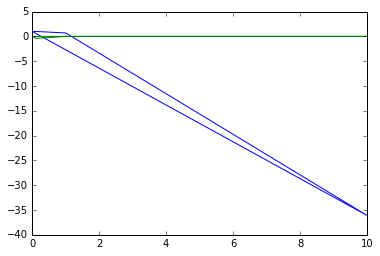

In [91]:
# Fit
def ridge(x_train, y_train, reg_param):
    n=np.shape(x_train)[0]
    x_train=np.concatenate((x_train,reg_param*np.identity(n)),axis=1)
    y_train_=np.zeros((n+np.shape(x_train)[1],1))
    for c in range(n):
        y_train_[c]= y_train[c]
    import sklearn
    model = sklearn.linear_model.LinearRegression()
    model.fit(x_train,y_train.reshape(-1,1))
    return model

# Score
def score(m,x_test,y_test, reg_param):
    n=np.shape(x_train)[0]
    x_test=np.concatenate((x_test,reg_param*np.identity(n)),axis=1)
    y_test_=np.zeros((n+np.shape(x_test)[1],1))
    for c in range(n):
        y_test_[c]= y_test[c]
    return m.score(x_test,y_test.reshape(-1,1))

# Load
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',')
n = data.shape[0]
n = int(np.round(n*0.5))
x_train = data[0:n,0:100]
y_train = data[0:n,100]
x_test = data[n:2*n,0:100]
y_test = data[n:2*n,100]

# Params
a=np.zeros(5)
for i in range(-2,2):
    a[i+2]=10**i

# Iterate
rstr =np.zeros(5)
rsts =np.zeros(5)
for j in range(0,5):    
    m =ridge(x_train,y_train,a[i])
    rstr[j]=score(m,x_train,y_train,a[j])
    rsts[i]=score(m,x_test,y_test,a[i])

# Plot
plt.plot(a,rstr)
plt.plot(a,rsts)

In [ ]:
# Fit
def ridge(x_train, y_train, reg_param):
    n=np.shape(x_train)[1]
    x_train=np.concatenate((x_train,reg_param*np.identity(n)),axis=1)
    y_train_=np.zeros((n+np.shape(x_train)[1],1))
    for c in range(n):
        y_train_[c]= y_train[c]
    import sklearn
    model = sklearn.linear_model.LinearRegression()
    model.fit(x_train,y_train.reshape(-1,1))
    return model

# Score
def score(w, c, x_test, y_test):
    # Compute predicted y values
    y_predict = np.dot(x_test, w) + c
    
    # Evaluate square error RSS
    sq_error = np.sum(np.square(y_predict - y_test))
    
    # Evaluate squared error for predicting mean  TSS
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_mean - y_test))
    
    # Evaluate R^2 score values
    r_squared = 1 - sq_error / y_variance
    
    return r_squared

# Load
data = np.loadtxt('dataset_3.txt', delimiter=',')
n = data.shape[1]
n = int(np.round(n*0.5))
x_train = data[0:n,0:100]
y_train = data[0:n,100]
x_test = data[n:2*n,0:100]
y_test = data[n:2*n,100]

# Params
a=np.zeros(5)
for i in range(-2,2):
    a[i+2]=10**i

# Iterate
rstr =np.zeros(5)
rsts =np.zeros(5)
for j in range(0,5):    
    m =ridge(x_train,y_train,a[i])
    rstr[j]=score(m,x_train,y_train,a[j])
    rsts[i]=score(m,x_test,y_test,a[i])

# Plot
plt.plot(a,rstr)
plt.plot(a,rsts)

** Altered Code ** 

## Challenge Problem: Predicting Outcome of a Fund-raising Campaign
You are provided a data set containing details of mail sent to 95,412 potential donors for a fund-raising campaign of a not-for-profit organization. This data set also contains the amount donated by each donor. The task is to build a model that can estimate the amount that a donor would donate using his/her attributes. The data is contained in the file `dataset_4.txt`. Each row contains 376 attributes for a donor, followed by the donation amount.

**Note**: For additional information about the attributes used, please look up the file `dataset_4_description.txt`. This files also contains details of attributes that have been omitted from the data set.

### Part (a): Fit regression model
Build a suitable model to predict the donation amount. How good is your model? 


### Part (b): Evaluate the total profit of the fitted model
Suppose you are told that the cost of mailing the donor is \$7. Use your model to maximize profit. Implement, explain and rigorously justify your strategy. How does your strategry compare with blanket mailing everyone.

### Part (c): Further Discussion
In hindsight, thoroughly discuss the appropriatenes of using a regression model for this dataset (you must at least address the suitability with respect to profit maximization and model assumptions). Rigorously justify your reasoning. 

In [58]:
# Load data
data2  = pd.read_csv('dataset_4.txt', delimiter=',', skiprows=1)

data2.head()

,BBK,2.0,MN,_,0,_.1,_.2,_.3,_.4,XXXX,...,1.0.31,L,3.0.11,D,X.1,X.2,X.3,3.0.12,A,4.0.12
0,SYN,0.0,TX,_,0,_,_,_,_,XXXX,...,1.0,L,3.0,D,X,X,X,14.0,A,7.0
1,DRK,0.0,IA,_,0,_,_,_,_,XXXX,...,1.0,L,3.0,D,X,X,X,11.0,C,5.0
2,BHG,0.0,CA,_,0,_,_,_,_,XXXX,...,0.0,L,2.0,F,X,X,X,2.0,A,13.0
3,L01,1.0,GA,_,0,_,_,_,_,XXXX,...,1.0,L,3.0,E,X,X,X,22.0,A,10.0
4,ARG,0.0,VA,_,0,_,_,_,_,XXXX,...,0.0,L,3.0,E,X,X,X,38.0,B,5.0


In [59]:
print len(data2.columns)

377


In [60]:
data = pd.DataFrame(data2)
data.head()

,BBK,2.0,MN,_,0,_.1,_.2,_.3,_.4,XXXX,...,1.0.31,L,3.0.11,D,X.1,X.2,X.3,3.0.12,A,4.0.12
0,SYN,0.0,TX,_,0,_,_,_,_,XXXX,...,1.0,L,3.0,D,X,X,X,14.0,A,7.0
1,DRK,0.0,IA,_,0,_,_,_,_,XXXX,...,1.0,L,3.0,D,X,X,X,11.0,C,5.0
2,BHG,0.0,CA,_,0,_,_,_,_,XXXX,...,0.0,L,2.0,F,X,X,X,2.0,A,13.0
3,L01,1.0,GA,_,0,_,_,_,_,XXXX,...,1.0,L,3.0,E,X,X,X,22.0,A,10.0
4,ARG,0.0,VA,_,0,_,_,_,_,XXXX,...,0.0,L,3.0,E,X,X,X,38.0,B,5.0


In [ ]:
d = np.shape(data)[1]
# Record start index of attribute in expanded feature vector 
start_index = np.zeros(d+1) # last entry would contain the len of vector + 1 

# Create a new data frame to store one-hot encoding of attributes

x_df_expand = pd.DataFrame({})

# Iterate over all attributes
for column in data.columns:
    # check if attribute is categorical, has less than 8 unique values, or is string values
    if len(data[column].unique()) < 8 or data[column].dtype == np.dtype('object'):
        encoding = pd.get_dummies(data[column])
        x_df_expand = pd.concat([x_df_expand, encoding], axis=1)
    else:
        x_df_expand = pd.concat([x_df_expand, x_df_expand[[column]]], axis=1)


In [ ]:
df_numpy = x_df_expanded.as_matrix(columns=None)
twent_five = int(len(df_numpy)*(0.25))
training, test = df_numpy[:twent_five,:], df_numpy[twent_five:,:]

x_train = training[:,:-1]
y_train = training[:,-1]
x_test = test[:,:-1]
y_test = test[:,-1]

In [ ]:
# maximize R^2 
# use y test 
# 7 per envelope